In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


# Steps for k means clustering

#### Assign random initial centroids 
#### Repeat (stop whwn centroids remains same): 
####    <li> &emsp; Assign examples to their closest centroid </li>
####   <li>  &emsp; Recompute centroids  </li>

In [42]:
def find_closest_centroids(X,centroids):
    
    m,n=X.shape
    idx=np.zeros(m,dtype='int')
    
    k=centroids.shape[0]
    
    for i in range(m):
        distances=[]
        for j in range(k):
            dist_ij=np.linalg.norm(X[i]-centroids[j])  # This statement finds Euclidean Distance i.e squareroot_of((x1-x2)**2 +(y1-y2)**2)
            distances.append(dist_ij)
        
        idx[i]=np.argmin(distances)
        
    return idx        

In [53]:
def compute_centroid(X,idx,k):
    #k is no. of clusters
    m,n=X.shape
    centroids=np.zeros((k,n))
    
    #for each cluster compute new centroid
    for i in range(k):
        cluster=X[idx==i]
        centroids[i]=np.mean(cluster,axis=0)
        #print(f'Cluster {i} : {cluster} with centroid {centroids[i]}')
    
    return centroids

In [94]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

get_cmap(n) function returns n colours for n clusters
<br>
EX: get_cmap(6) <br>
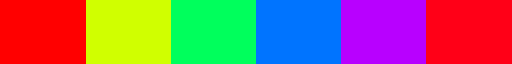


In [110]:
#Position of initial centroids
def kmeans_graph(k,X,centroids,idx,get_cmap):
    cmap=get_cmap(k+1)
    for i in range(k):
        plt.scatter(X[idx==i,0],X[idx==i,1],c=cmap(i))
        plt.scatter(centroids[i,0],centroids[i,1],marker='x',s=100,c=cmap(i))
    plt.show()

In [126]:
def run_kmeans(X,initial_centroids,max_iters,plot=False):
    
    k=initial_centroids.shape[0]
    centroids=initial_centroids
    
    for i in range(max_iters):
        print(f'Kmeans Iteration {i} / {max_iters}')
        previous_centroids=centroids
        
        idx=find_closest_centroids(X,centroids)
        centroids=compute_centroid(X,idx,k)
        
        #plt.scatter(X[:,0],X[:,1])
        #plt.scatter(centroids[:,0],centroids[:,1],marker='x',c='r')
        #plt.show()
        
        
        if (previous_centroids==centroids).all():
            break
        
        if plot:
            kmeans_graph(k,X,centroids,idx,get_cmap)
        
    return centroids,idx

In [6]:
def kmeans_init_centroids(X,k):
    randomidx=np.random.permutation(X.shape[0]) #Shuffling numbers 0 to X.shape[0]
    initial_centroids=X[randomidx[:k]]  # selecting  K rows as initial centroids
    
    return initial_centroids

In [7]:
def generate_data(m,n):
    X=np.zeros((m,n))
    for i in range(m):
        X[i]=np.random.choice(range(20),n)
    
    return X    

In [141]:
# if you want random example then uncomment #X=generate_data(m,n)
m,n=20,2
#X=generate_data(m,n)
X=np.array([[17., 16.],[17., 14.],[ 0., 15.],[ 5.,  9.],[15., 16.],[ 2.,  1.],[14.,  6.],[13.,  8.],[ 8., 18.],[ 0., 14.],[19., 13.],[16., 19.],[16.,  1.],[ 8., 15.],[13.,  3.],[ 3., 18.],[ 2., 17.],[19.,  4.],[ 3.,  5.],[16.,  0.]])

In [122]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [155]:
#Example if you select 4 clusters
k=4
initial_centroids=kmeans_init_centroids(X,k)
print(initial_centroids)

In [124]:
#Position of initial centroids
plt.scatter(X[:,0],X[:,1])
plt.scatter(initial_centroids[:,0],initial_centroids[:,1],marker='x',s=100,c='r')
plt.show()

## Selecting best no. of clusters 

In [149]:
J_hist=[]
m=X.shape[0]
max_iters=20

for k in range(1,10):
    
    initial_centroids=kmeans_init_centroids(X,k)
    
    centroids,idx=run_kmeans(X,initial_centroids,max_iters,False)
    cost=0
    for i in range(m):
    #    for j in range(centroids.shape[0]):
        cost+=np.linalg.norm(X[i]-centroids[idx[i]])
        
    cost/=m
    J_hist.append(cost)
    
    print(f"Cost of cluster size {k} : {cost}")
            


In [152]:
plt.plot(range(1,10),J_hist)
plt.xlabel('K Clusters')
plt.ylabel('Cost / Distortion function')
plt.title('No. of clusters vs Cost')
plt.show()

### By elbow method , we choose k = 4

In [159]:
k=4
max_iters=20
initial_centroids=kmeans_init_centroids(X,k)
centroids=run_kmeans(X,initial_centroids,max_iters,True,)

# Image Compression Example

In [212]:
import urllib
img=urllib.request.urlretrieve('data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxITEhUSEhIVFRIWFRUVFRAWFRAPEBYQFxUWFhUXFRUYHSggGBolHRUVITEhJSkrLi4uFx8zODMsNygtLisBCgoKDg0OGhAQGi0lICUtLS0tLS4tLS0tKy0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLf/AABEIALcBEwMBIgACEQEDEQH/xAAcAAACAgMBAQAAAAAAAAAAAAADBAIFAAEGBwj/xAA+EAABBAAEAwUFBgMIAwEAAAABAAIDEQQSITEFQVETImFxkQYygaGxFCNCUsHwYpLRFTNDU3KC4fEkY3MH/8QAGwEAAgMBAQEAAAAAAAAAAAAAAwQBAgUGAAf/xAA5EQABAwIDBAkDAgQHAAAAAAABAAIRAyEEEjEFQVFhEyJxgZGhsdHwBsHhFDJCcuLxFTNigqLC0v/aAAwDAQACEQMRAD8Aq3sQS1TleUMOWA1iymqdoTnKTkPIUZrEcKbCjtelw2lDOrEKyd7VRM6r5JkD7QqZSoIVt2qE7EUkO3QZ5lGUquRWhxKj2yqmTEq24Zw+WX+7Y53iB+uylrXPOVgJPAXUxCkNVhhV27gvZGpXd/bs2EEg9CTz8ACnYeGsFZ2iO9u0JLjz7rLGb96J5mxMVVGZxDRzMnwE+q9mXKnDrf2RdLP2YcRHEXGtXkltX0ZQ+q1Hg2tNtgc9xq3PIY36H6pxv0yf4q//AB93KuY8Fz7cEsdgVeSybiQMYP8A1yRF3zP6IMuMhH4JCPzF7T6gNVHfS2IAllYH/aR5yVQvVI/CUlpIqXQh0DtQ8a8ssl+tUtTcHLhbDfxbfpaVfsDH09zT2H/0GqRUBXOByKyVZi8G9pog/O0s0LMq0XU3ZagIPAq4M6K0hmTGe1VsKJ2tJYsUJuQpKZb7a0KR6MxquEu9aY+ltxUaTAAUpqGYqygkVTCxWELVICgqwY61LIhRI4coIVChliIGrdrVoDghEKQWLWZYhwVSFXPcoFDe7VCdKnmBFamlEuQO1pDfiERGCZL9EtI5A+0oUk6I1pKIAtTSJR0qx70FyJkV4Ru2Uo2ueQ1oJJIAA1JJ2ACWau7/APz7AR/eYmUgdn3IwdQZXCyfMN13U0qPS1Azj6fLDtVXWVn7PexfZxCadofKf7vD7tvSs520uyToAOZIXR9llPZxHK9oAJaMz2t/E4X3Ix0N8tzoRRYz2gMjyAxz9BlHebGSdM7yKJaNhVc6U4sRG9+QztHuku1EWe9mxxjvnlZI8l0lLC9GzK2w5ffj8jlQFso+AjiY95bII9dXsD8TiZCfxOl0Gp6H1UTw5r7cyKUt1zSyPjiY43dlx1+FK3dgpXABjssQ1JaxuFZl89C74qqnwkYupmTXdM7N8rQdNaizVWnoFdgk2N/nIeauYAQpJIImm3RNNe7C/O86/mMmvwCo8S9r3k99wvUuew0DVVpV+F+acx78R+GGAV+LsTFp4Z3B1/7VVHFCi18bHGrOUlrtOVgnr0TjGmEu4hWTMNODcIdlrf8A8cD0Eh+iWxeLxQvO6QeZNV4EjbxSnZNePu4Za072bMB502z6qcGGaw2JJQQPeaxxc0n+B413r3kQU3Az7KhcDZMSzMLe/JMed5YpgD8QDXkUF2NgdUYa+6rOHSRE+bXAt9FF87onZnmKWxq18Yhk88umvkUDGYmIEOdhaJrVkji0g+oBXs+Uw72+earlzC3un8Fwt7QabK5nWwXD1FFL42GO/e18QGSDz5FAgwMsneiDg38ufO6ulM1v4KbZK0fHJn/Lef1ZJr6EKlalRrDJVaDyVesBZV8tDY2OqXc9XGMjbQuAsvchrmi/I7KrxWGcw67cjyXG7R2UcOTUZ+zxI7eXPuTDHA2QMyi560ShOKy2hEhEJU40uXLTZCiwpIVnGU3G9UzZ0ePEqAIVCFdNes7dVv2pQOJV8qjKrYzrbZFUfaUaLEKjmr2VXFrST+0rEGFGRVsj9UB0qXlm1UCSmqYsoa1GfOl5J1gatOjTAhHaEAylTY9b7NRIpWDgETREC0WqLEQFDfVVS5ZFFa6J2KdFBGCC2JxIYNcrpNQ9x55RmboNe70CD7L8GfipQxoOWxmcBdD+q67jRfhYTF2LS4Pa0tbYbu4WW7tsOGrfzjyTGArmkXVeHz2RaWHdVjnYc1zzZBK2+37RmruyDckjyPxFos0Nu8AAKAKawheS0CKNrCNGdtFG6tDvYcT5mkvxXCh3Z4hkRgLS4SNZnDc4yhrsjbLSAKvKbocwkJOI0c9B+tmQueXn4l36LrMFiW4mnbXv5XGluMpDE0HUHw7T58su/wCH4Jj/APCmbRDjeSWGhR3FkjxBNKs4rhKBOWIHl97LE3zyPNX8FzzvbGJrMpYXOBJDXPtrXXfNxby2oouO41BIwPLCx/dqIOeY3XdmycrT5DSkZoIfM/PFeLwR89k0AAbfEXtOzu1lj88pvLz5KEuNDe42AgnZp7CUnyLm36qi4lji1oEjXAuAIDZWNBB5nQ/RUWI4yLa2Njg6wAzM+QWTpzNnyCI+pRpjM8/PnBCHSOMNC6TFynNrmi/05I3H/aCAUoMPO05m5rGrQ54ikrwYXWqt88rb7XJGSayuhmcQQQDZJDgRrYA5IMnEb7sz8zDeVzO8yxprzB6jQ6jqEE4/DPOVrr+A8Tb1Vv0tdglzfnL4Fex8UlDSHsdkJ7wNgX5mwT5hNQzQzjLcjK0BLoi0V1vKCqLA4gsFQzAWNWk5B6EUR+zSLnDwRK5rH7juEa//AEadP5VdwzN61z4jxVWuym3zuVpA50DiCMzDpny8uRBOnofipTxSSODocQHgbRZhE4f7DQPwJVHhjJE/MxztdLz5muHPU2FPHF9F5jlB/NG0Ob8QNF5rAREER2+th6Kr6jmnWU9jeI4pvd7SQfwu1CJFxYyARuAzbXoLVHDJiLsOkAH4aGg8jsnDioyO815cN3fi+QSVZzmgw6AdzxA7jxRAGu1E/wAtz4JqeMtNEIDguj4Xw7tY9dQR3XePj0VFjcM6Nxa4f9LgTVpmq5jDpx18rJlrpS2VYWojVjgigr0oVKTbtEaxE7NTmUShuKA96byIT4UVpC8Clu0KNDOtGBbEKsYIRQQmvtCxAyrEKAvQEvmWZkNgUqVtEEKYKkSl3KBcrSiI5IQnOQyVpelSihyd4dhHSyNjbu478gOd+ASLV1nswzs4zMR3nnK3waDr6n6BLV6mRspvAYQ4quKe7U9g9zA753L0bgD4cFCGRAGQ6ZjvfMnxP70VfxTCvm+8a77witSQ1w71ajZwveiCCQQeXNP4kRqUZntMGbWT+/VEo4kECLR8812D9jnL1RP2jQDgAl/aHimKjGSXRtUC4NeTqO6abR2B0saDyHB4jDueA/cN0DbcO600co3vVp1/N1pd3i/aFrwc3ev8J218/quN4xMAbYCGkZco23Gw5hamDxLTVDH2HHcsbaOyqlGkagVHLEWuJNBxB0Ou4IB28UASPHP00/fJXLiKpwDrzd82ddxXQ7pSXB6X121FXzu/ith9CvTM0zO/nfs7QudbUpuFxCrpHuO5PmT9Vb8MwIFEuc1xk7PTuyCmdo/L4msrfMeSjgeHuDyTGX5LLmB2UgaaitSE8OzDaFe9mLbEbg+xl7rDbSKd3m2dRos3ENqky6Zn03BaGEdTaTJ3EA8CdD8k8iq7C8VL3uPZRtqN78zW94PY1zg5zzbnAmmkOJu+uqa4iW9qWtbTXBpdGK7riwk+NggCuviVmJx7G2AwEkhxJ7NwJrMLyMbnqwacTR8UHhmClncSxpIu3HvOAB963AXZoba7ITGuc/NBG6N58OxFe8U6JpZgZIPZE3kxcgxbvUp+DPJAYwl24aO4+jzDHalv/eylAMQRl7Fxq9WsLh/M3/ldI4ANyWxgd7zWsDXyDo4A2G1+YgLHNJbUTWBuoMpY57R/MKHwaV0OEa6xM3F+fcsbEFvJc9FI91tc0Mrf+/v0Br1C1FqaLnHxGZg+Y1+Svi5zWa97o5zsoo7ZY2615tpBjeXgNyts7Zw1g+DiNfgnzFhN+Y9j9kpHL0+6rcktksc517iy46dAr/2djo5nxtefEgOHmCqmnxyAljTR96Mgga6LrMPGC0PAIcRqazi/9S4z6lxdZp6B8hpvqYPd+SjUctiAPv5ewV9gohl0bkdvWhCpfabA52h34humJ+JAENJrTQj9UJ2Kce6/ntemi4um17Hh6eqXZIXH1SlaY4lhix3gdQlVttcHCQlMwIkIsYTDWpeJqbjVpVCVARrTwEwhyMRWrwShCgXqcraSspRolEBRM6xLWtqIV5Q2OUyUBqkXL0FRC24oVKa2GqCrKIat5UQNUwxUlVlALV2k4EcbW/laB8a/quTIpdNx+Sj50k8SCXMB5/Zdb9KMDqlQn/T/ANvZVWIxBO6UdIoTTJTET9PXkjU6e5dhiMU1giUXE4wjQGlXNmdIe7bq3IArTqdrUJRe+vh/VRdMevw2Honmtyi2q5jF4ipWJGjfVWLA7V1EiQ+IAlsHTyHqmcNRIBoHIdCO6b3vzFJaRzsjHZjQAvYU7lXjSLnDjZ1b2fdP5qJH00XcUyXtBNzYwYi4kxqReeU23wvn9QBji3QAkSJ3WHLSOfBWEbu9lpooj7o1lL9BbCduWiliIY3kmYgH8J7KQOFdDHlPyKVifqGkZmUHV+IA8wfRNRPptMl9119m4W34Xt5IjqWbqx5fb2sobUi8+f397pL+wIiMzT3R+Jxe5xOulVpy3arFuMgjbkb2bW/5YZM7M7TvOrnp1/okZJmk99oZzDml1X5dFuQyOF5mlp/gINebd0t+nYJLB4e1iO096L0pNimmY0O/u47I2GRsbPM+84jwv4FNYZgOYzuF6AMBiY0VV019VqBrRS0eCc0XG8Cxycc3xG9/BDHD5Xd58jiOVk5L21JOnqpyPjrNPYLDvOp8+xezCbEd+vgrHDzFwdkOWNupc13auJP8WjR5m9vJJOxbTYLXBv5u7M8/E7+qnOwN7pa0Emy90ofZ/fikO1Y095wJ5GOSJp+RtQemZeBHerTTcNTPcgtmg7QaG7/GA31C9H4LhWiPYDmADYrwPNcbwzCDESBoiJ/ifr88v6rteG4N8YykjL+XcgdFwX1VVa6s0AiYuB2pjDtgxuWYrhjXOLq0qqu1XPxzh9zK0Fg0ZIR3wel9F0AlHPZc57RyOrca6V1XO4ao4nId9kxVsxVOPJeNtQqkDVWWFBaO9v8AogYmGjY2WtTOXqrMZAEBBaUZj0sXKIkRwFBCezrZkSXaoZmR2heBhMTuSUhRHSIDyihXBUVtQzralEQbWgsCxHyqykEVqExMNCGWKqJGxMCJQhCaYEMtUSlnQqz4jJniaeoAPmNB9ENsaMcLbaH/AAgVqeaCNQtfY20BhK5J0cIPLgezUHtVDJCa0GvVIYmCTfKT5W75brqvsZG4pC7CkSkeqCi4jatZtd8wRPzRcY+1Cl30eHad2g+YBRTgov8ALb6BXOIjchnagOrfNcjhzG1kZdz3buNQdT6UlsLiNacLZRABo6Xv8P0WvaDAuikNe4TY8PBJMxBIobBdThca17WxaAI56WPgsipSzEvBmfJWrpnMeC03yG1UeWialnBbYFPGpbsdNLHXyVAyY6ddrPhsmpsUH0XA3WpH1TzK4LXQdd3sdZFu7sQTSMi3f+NFcxzCRutB29bX5eKlHKWOp2o6C26+qqm4lr2gDR9fA106J5mIfuW2Bpr9CmWkOhwN+I3+xQSC3qkdyLJiI3GmNzE/4d5XWfHb1WRxODqDXtdWjHhzSf8AS4Cj6oDMRE4kUGn01TQMjmEB4c0fheQT+/FeNPP/AE/JXs+X8/IQJcCbst0BrK7N8xVokkD67kD9vejkA0+ABRGzhpDZGOy1qWvpp9D+iybIT92H1+U1f82leiDTohp6p9/MFEfUkX/CzhM08ZuLETMedwSCPIk7r0MY09i1zj3xWYjUHxXmrXszA95rhrZJJrzXacPGeG3a7HfUD9Vw31RQaKrHkDhP8R/m+cU9hKhccnyeUImN4sBZ+nVUkmKMoAvW7VtxLCRGmtcA7p4qk7HK+jte6w8O1kS0XUYt+RpCbxE2gBG3NMMa13d5EaJedt6NF+KzDvINcl4jq2WdSqTCq8fAWO8EoXLp8Rh+0BFarmsbhnRmiNOqcoVQ4QdU1EoRchPkWZ0KUpxqrkW+1W8yC0IwCIVdrVqltZmWLyvCylukbs1BzE2DKqoNTMQQAExEvEKCmoWpqNqDAnI0BzVQokTU01qAxMNKGQplbc1CfEjgqMrlRSlxotl6C96GXqpClB4rh2yNLT6rkuI8M7PUajmusmeqvFu3RqGIfSIi44KzSQuWGv8AVEutPmp4yPK7TYoLDyXQ4eqHgEIjgmI6Fa6XdjcJ/tntGhzNO4HMdfAqrvSk1hJRVHR3I+C0aDwOqLfNPnil6jZumeHxxyFxcTv3b09UxJhXA90/EfqP1S3YkdN9xtRWOmLT9EcZWNh4g8dNUEy50tPcinGuHde3M0ctnDx0Qi8HvRk1zs0QenitXm1G6C0m/wBUB9QzJMjd/dEa0EQBdO4BuZ2pzdbqtPBdlgC3s8swew7seK7MjkCFx+CbTgdqonxXcPxwEAbQII93Q6rjNvPJcxo46707RLWy+bhVchIdZNkH90tuIJzHUn4aquE7tjvf71TmEfRObY/JZjmECVj1M8km9+9Slmc2jXd5+SYwzmv9woj4+Vgk6/BCZCG+7p/VBLgRzV2NZKtIgQOpRJ8M2VveAQMO6tyrGF7bHRJvJBkJlpgLiuK8JdGSWi2/RU717B9hjk0LRquM9qfZfIS+P02TuE2kx5DH6q8wJOi5JoU7UXWNDoVHOte6JCla2hZlimFKuGtWGJEYitCIHIJSTolprE6Y1sRIoeF6VmHanI2IUcdJ2Jq8bqCVBrVO0YMUXsQioWNchTOWyUvK9UhSEN7kB8yhiJFWzYheyogCZlnSGJlQ3zJWV9qQ1WAS2KNpVW+Fw4Nh3TRLYjAluu4WjhsQxoDCm24V72Z2pQHmmMLGHboTISTSsxDlAAGtbraw8E3iPVJVWuA0PssaS2qcSpuAOo9K0BWObsfkta0drT5dAM6JLVDBANlRdqdvgpMgceVpp3CpN3AgVuRyWViMa0DKTqm20HAZyLLeFFDXUch4q1gmprm66+7zI8ErHE11NYDdUQQR8dV03BfZhzyC47Wco5+K5LaWIYHZnmFehgq9Z5cxvK+nsqGKC3W4WB6E81b4PCOkIDRVadPiunZ7NNDgOXkf2FeYHhLW+J6rAxG0mR1U0zYlUuDqrgBwBXFf2JOO9l8LO6RdGQe9uF6bicMctDdc5iuCve8kjRBoY/POeAjYnZbB/kg371zcWFkfqBYXR8HwN0X7BWsHDBHGG1rzU5GU2hsvfqOmnLoE5gdmMaQ+pfhwn8Ik2KjApvJVcc7ZyY3g67JbGT5AS4d3rzRMDiIn5TGQ5te9sb8UVrnubMCBvWrja2Hw9BwqmSbRN1X4v2La+61/fVcJxrgMsBPdND1/5XtGHflRuLYWKWGntGZaFOs+m3MDYag/bmuDZVIC+du1Wl6PP7GtLjVb9AsTP+K4dE/VN4Fc4worErG5HY5PIhCYajRoDXokTl6VQpxjExFGgROTsJU5lC21qyRqOAhSFTmUqrxeirnzq1xSpp41GZWCDM+1WYpqdkdSWm1VpRWpFEjitSDE1E1Ue6FK0BlrRSbgnyENbevyRpGbLouAMLWZgLPilX4g0mZm6rpdjUhXpZDuQMD7KBo7zxZ56D0Tx4TE3TU+GiYfIXGyKRoImuOmnXolH7RxAFqhHZHrqunZhqdMXaPAHzMqjxXBWE7WPMlRwns+3cgeeq6iVjWjTUpZsbiV5m2cUGZc9ud0N2FwtU53U2yN8R6JWPBMbQAs9aCsmwBzQHD1Q3BreVu+i0ZDpaRrV6tY5nOJRBTAaGsEBZHw4Od3GgeNarsuGYMRMAO/XmlOB4Om5j6KwxRJ0Cx8TXNQ5JsFk4qtnPRtsN/at5hy9U3E3RIZdk9EdEk8WSVQQLLblstCjeq28qiEkeINJaaVK/EkhdBI5c5JFcr2t23T+FeQCFoYSDM9qGycjcZmn4haHZwuzNGjvQFN4XCa0VDiUeRvQfRNsrZXwN6T2zhGYimSz940PEcEKTjFeB5LX9qZtzr8lzOIl6mze/KlLD4vr8E7UY57blfPyXdy6r7aFio/tg6rEr0BXsy4CGVNRvVUxyM2VdiWQtlzVZ5kaOVVbZ0QSqkIRYryGVWEEi5qHFKzgxahUyq47ZQklVa/EIZxaqohNyyBJYkBCdOhyzKFISGJCCiyutCyosWRgFCkWJy12a0xtFUdorEJmU92+hXScCxg7EjLqFzoHdK6f2TyZTmGizcZHRSRMFb+waga5wO66O7Fty3l05qeGxbTtoEHEsZnIb7vMcksOHkG2P06JLKwi9l27W03N3ieKtZXO8x1UYi52loMYP5q6hNNkYNt/HZBIiwQSIsEz2bK8U7wzA3uL80pERpoa/VXGHx7WNASdYuAhqRrveGw1OB5YNTp0W48QDskZpjJ7oR8JhyN0mWACTqkHUwGy7VOwi03aBGRyUyUs66TdcrK1WOehl6E56nLKkNnVDxUiThiyvzb2iyG3I1aJgHKI4podVscUwYxuFQe1uIyxXvypXkLuS5b25k+7A6uCJg2zXaDxS7w7K4NN4MFcT9qdtloeKLh8WTo4V08kAu5DdaJ2PNdQWg7lxeMwb8NU6KoL+qc7bxWJftB0WKmRKRyXKZiphyG0oi6FbKkJEwyRKuC1nKqWgqITXaapmDFKpLipAlVyBDLVePxGm6UfikswlDkYVTIFXKn24rRRdibSD7UA4q4pBWDU72iLG5IsemGPUuap0T7VCViEydTD7S72lRKNEV1HsuAW5T1K52GJXnBn5T8VmYts0zC0tk1uixHaIVjjsE5j7q2lV7g5rszf5eSvpuIbZmWOqqOIStcDkaR9VnUXPNnDlyXdYbEPfDI7zomWwF7c2XvfJMR4XLRrzVPgcYWnKSQeXir6DFO2VKoe2yLWFRttyOyS21Sf4fgA42VXg3rddeiNHint0GyTeDHVskKjXEENsuhAawUKQZJLND1VZFiHP0O/hsnYyABqkzTy66pA0smtym4TQR5NtFUTY0DbZbixjjtqqmi43VTQdqn2AlQnfQUYpjz/ogzy2dF4NJKhrSXXQ82tkI+YUgmYAJObGjkihhdojhhduVg7FBoslcd7X42wNdzoj47Hgk2dG6nzXJcSxZkfmvQaNHgtTA4SHhxTOGwhdUDjoEFz9iEWVwrz380m52iFrX6rbySsP6sFOGtP7tQeH90z2/8SxKLFbIFxOTmVWCJFZEtrFplxWtKKMOifZVixDLiqEqQwdogwKxYvAqhJWxg1j8MsWKV6UL7KoOwy2sUqyXdAoFq2sVwV5Sjan8NGtrECsTCoVc4SBWUUNLFiTIBsV5ri0ghXGGNx67qh422W6a0AdbCxYsWgctU2XY0arzTD5MpJjjI0aU8bFThxkjHBpd+qxYnTBJaRZdLhqhe2HXsr7D4pzxtr8kyJSNSLWLFnPaA6EKo0B0IsOLcDewT8bjI3oPmtrEtVAAkJWuABIChM1vim8LCAtrEB5MJSoTlWYzE5dlUT8QpaWI1Cm0hEptGVUWM424urkN1qTimVtnU8lixbAoMsIWlTY0wIVHisc5++g6eKSdItLE8xoFgmHnKMo0TmBwbnlovQ6k/orDH4EUQNxssWJSpUd0i4jaI6Rr3Pvf0VHR6LFixOSuMX//Z',
                               'bird3.jpg')

In [219]:
orignal_img=plt.imread(img[0])

In [220]:
plt.imshow(orignal_img)

In [221]:
print(f"Shape of Origninal image = {orignal_img.shape}")

In [223]:
#getting values within range 0 and 1
orignal_img=orignal_img/255

#Reshaping image into m x 3 matrix where m is no. of pixels
X_img=np.reshape(orignal_img,(orignal_img.shape[0]*orignal_img.shape[1],3))

In [224]:
#Compress image to 16 bit
k=16
max_iters=10
initial_centroids=kmeans_init_centroids(X_img,k)
centroids,idx=run_kmeans(X_img,initial_centroids,max_iters,False)

In [225]:
#Represent image in terms of centroids
x_recovered=centroids[idx]

# Reshape recovered image into proper dimensions
x_recovered=np.reshape(x_recovered,orignal_img.shape)

In [227]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,2,figsize=(15,10))
#plt.axis('off')

ax[0].imshow(orignal_img*255)
ax[0].set_axis_off()
ax[0].set_title('Original image')

ax[1].imshow(x_recovered*255)
ax[1].set_axis_off()
ax[1].set_title(f"Compressed {k} bit image")

plt.show()